# 1 - Rehacer todos los códigos dados en la clase 65. Desde la celda 285 hasta la celda 364 del Notebook: Primeros_Pasos.ipynb. Añade además tus propios ejemplos
# 2 - Ejemplo usando operaciones aritmeticas entre dataframes
Explicar los códigos propuestos y su respectiva salida.  

Los codigos relacionados a las visualizaciones (Pregunta 14) no hay que explicarlos pero si debe analizar cada gráfico y comentar que muestran o que sugieren.  

Al final del notebook desarrolle las conclusiones resaltando los principales hallazgos (insights) y elabore recomendaciones de mejora del negocio. 

In [3]:
import numpy as np
import pandas as pd

data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
 "year": [2000, 2001, 2002, 2001, 2002, 2003],
 "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.3]}

De_Cuba = {"Provincias": ["La Habana", "La Habana", "Matanzas", "Matanzas", "Ciego de Ávila", "Ciego de Ávila"],
 "year": [2018, 2019, 2018, 2019, 2018, 2019],
 "pop": [2.0, 1.8, 0.8, 0.6, 0.2, 0.1]}

frame = pd.DataFrame(data)
frame_Cuba=pd.DataFrame(De_Cuba)

frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])

populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6}, "Nevada": {2001: 2.4, 2002: 2.9}}
poblacion = {"La Habana": {2018: 2.0, 2019: 1.8}, "Matanzas": {2018: 0.8, 2019:0.6}, "Ciego de Ávila" :{2018:0.2, 2019:0.1}}

frame3 = pd.DataFrame(populations)
frame_Cuba1 = pd.DataFrame(poblacion)

print(frame)
print()
frame_Cuba
               

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.3



,Provincias,year,pop
0,La Habana,2018,2.0
1,La Habana,2019,1.8
2,Matanzas,2018,0.8
3,Matanzas,2019,0.6
4,Ciego de Ávila,2018,0.2
5,Ciego de Ávila,2019,0.1


Aritmética y alineación de datos

Pandas puede simplificar mucho el trabajo con objetos que tienen índices diferentes. Por ejemplo, al sumar objetos, si algún par de índices no es el mismo, el índice respectivo en el
resultado será la unión de los pares de índices. Veamos un ejemplo:

In [5]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
print(s1)
print()
s2 = pd.Series([8.3, -2.5, 2.4, -1.5], index=["j", "k", "l", "m"])
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

j    8.3
k   -2.5
l    2.4
m   -1.5
dtype: float64


CREA UNA 'serie' EN LA VARIABLE 's1' Y LA MUESTRA CON INDICES Y VALORES CORREPONDIENTES

In [9]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
 index=["a", "c", "e", "f", "g"])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

IDENT ANTERIOR SOLO QUE SE CREA LA VARIABLE 's2'

In [10]:
s1 + s2


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

SUMA LOS VALORES DE LAS SERIES 's1' Y 's2' (POR SU INDICE CORRESPONDIENTE), Y DEVUELVE 'NaN' CUANDO UNO DE ESTOS VALORES NO EXISTE 

La alineación interna de los datos introduce valores perdidos en las ubicaciones de las etiquetas que no se solapan. Los valores perdidos se propagarán en los cálculos aritméticos
posteriores.
En el caso de un DataFrame , la alineación se realiza tanto en las filas como en las columnas:

In [8]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
 index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
 index=["Utah", "Ohio", "Texas", "Oregon"])

df_1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("abc"),
 index=["Villa Clara", "Camaguey", "Las Tunas"])
df_2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("cde"),
 index=["Santiago de Cuba", "Holguin", "Granma", "Guantanamo"])

print(df1)
print()
print(df_1)



            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0

               a    b    c
Villa Clara  0.0  1.0  2.0
Camaguey     3.0  4.0  5.0
Las Tunas    6.0  7.0  8.0


SE CREA LOS DataFrame 'df1' y 'df2', se genera una Matriz  de 9 elementos de orden (3x3) con la función: np.arange(9.).reshape((3, 3))
Y LOS INDICES DE FILAS: index=["Ohio", "Texas", "Colorado"] EN 'df1' Y index=["Utah", "Ohio", "Texas", "Oregon"] en 'df2'
COLUMNAS "bcd" EN 'df1' Y "bde" EN 'df2'

In [11]:
print(df2)
print()
df_2

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0



,c,d,e
Santiago de Cuba,0.0,1.0,2.0
Holguin,3.0,4.0,5.0
Granma,6.0,7.0,8.0
Guantanamo,9.0,10.0,11.0


Como las columnas "c" y "e" no se encuentran en ambos objetos DataFrame, aparecen como ausentes en el resultado. Lo mismo ocurre con las filas con etiquetas que no son comunes a
ambos objetos.
Si añade objetos DataFrame sin etiquetas de columna o fila en común, el resultado contendrá todos nulos:

In [12]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})

df_1 = pd.DataFrame({"C": [2, 5]})
df_2 = pd.DataFrame({"D": [6, 7]})
print(df1)
print()
print(df_1)

   A
0  1
1  2

   C
0  2
1  5


TANTO 'df1' y 'df2' SON DataFrame QUE SE CREAN DE UN DICCIONARIO DONDE LA CLAVE REPRESENTA LAS COLUMNAS "A"; "B" Y (1, 2); (3, 4) DE LA LISTA SON  LOS VALORES DEL DataFrame
LOS INDICES DE  LOS DATAFRAME SE GENERAN DE MANERA AUTOMATICA.

In [14]:
print(df2)
print()
print(df_2)

   B
0  3
1  4

   D
0  6
1  7


In [16]:
print(df1 + df2)
print()
df_1+df_2


    A   B
0 NaN NaN
1 NaN NaN



,C,D
0,NaN,NaN
1,NaN,NaN


El resultado de la suma de los dos DataFrame es NaN porque no hay columnas coincidentes

Métodos aritméticos con valores de relleno
En operaciones aritméticas entre objetos indexados de forma diferente, es posible que desee rellenar con un valor especial, como 0, cuando una etiqueta de eje se encuentra en un
objeto pero no en el otro. He aquí un ejemplo en el que establecemos un valor particular como NA (nulo) asignándole np.nan:

In [19]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
 columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
 columns=list("abcde")) 

df_1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
 columns=list("abcd"))
df_2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
 columns=list("abcde")) 


Esto son casos parecido a los anteriores, solo que los indices de las columnas se generan de forma automatica...

In [18]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [19]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [20]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


En este caso se encuentran resultados numericos en las columnas coincidentes de 'df1' y df2'

Utilizando el método add en df1, se pasa df2 y un argumento a fill_value , que sustituye el valor pasado por cualquier valor que falte en la operación:

In [21]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


La operación anterior asegura que la suma se realiza correctamente incluso en presencia de valores faltantes, reemplazándolos por un valor de relleno especificado ( se hace con fill_value=0, donde los valores faltantes de sustituyen por 0).

Véase en la siguiente tabla un listado de los métodos Series y DataFrame para aritmética. Cada uno tiene una contrapartida, que empieza por la letra r , que tiene los
argumentos invertidos. Por lo tanto, estas dos sentencias son equivalentes:

In [22]:
df1.rdiv(1)


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


Esto calcula el reciproco de la division de cada elemento del DataFrame 'df1' por '1'

Al reindexar una Serie o un DataFrame , también puede especificar un valor de relleno (fill value) diferente

In [23]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


'df1' se reindexa con el nuevo conjunto de columnas de 'df2' y se le aplica el vallor de relleno 'fill_value'

Operaciones entre DataFrame y Series
Al igual que con las matrices NumPy de diferentes dimensiones, también se define la aritmética entre DataFrame y Series. En primer lugar, como ejemplo , considere la diferencia
entre una matriz bidimensional y una de sus filas:

In [24]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

La expresión arr = np.arange(12.).reshape((3, 4)) crea un array de NumPy que contiene 12 números en punto flotante (del 0 al 11) y lo reorganiza en una matriz de 3 filas y 4 columnas.

In [25]:
arr[0]


array([0., 1., 2., 3.])

In [26]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

La expresión arr - arr[0] resta la primera fila del array arr de todas las filas de arr, resultando en un nuevo array donde cada fila tiene los valores de la primera fila restados de los valores originales. Esta operación es posible gracias a la difusión (broadcasting) de NumPy.

Cuando restamos arr[0] de arr , la resta se realiza una vez por cada fila. Esto se denomina difusión y se explica con más detalle en lo que se refiere a las matrices generales
de NumPy Avanzado. Las operaciones entre un DataFrame y una Serie son similares

In [21]:
import numpy as np
import pandas as pd

frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
 columns=list("bde"),
 index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]

frame_1 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
 columns=list("ABC"),
 index=["Santi Spiritu", "Cienfuegos", "Mayabeque", "Artemisa"])
series = frame.iloc[0]
serie_1= frame_1.iloc[0]

print(frame)
print()
print(series)
print()
print(frame_1)
print()
print(serie_1)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

                 A     B     C
Santi Spiritu  0.0   1.0   2.0
Cienfuegos     3.0   4.0   5.0
Mayabeque      6.0   7.0   8.0
Artemisa       9.0  10.0  11.0

A    0.0
B    1.0
C    2.0
Name: Santi Spiritu, dtype: float64


frame: Es un DataFrame de pandas creado a partir de una matriz NumPy de 4x3 con columnas etiquetadas como 'b', 'd', 'e' y filas etiquetadas como 'Utah', 'Ohio', 'Texas', 'Oregon'.
series = frame.iloc[0]: Selecciona la primera fila del DataFrame frame, que corresponde a la fila etiquetada como 'Utah', y la almacena en series como una Serie de pandas.

In [33]:
import numpy as np
import pandas as pd

series


b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

Por defecto, la aritmética entre el DataFrame y la Series coincide con el índice de la Series en las columnas del DataFrame , difundiéndose por las filas:

In [23]:
print(frame - series)
print()
print(frame_1 - serie_1)

          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0

                 A    B    C
Santi Spiritu  0.0  0.0  0.0
Cienfuegos     3.0  3.0  3.0
Mayabeque      6.0  6.0  6.0
Artemisa       9.0  9.0  9.0


La expresión frame - series resta la Serie series (que es la primera fila del DataFrame frame) de cada fila del DataFrame frame. Esto se realiza mediante la difusión (broadcasting) de pandas, resultando en un nuevo DataFrame donde cada valor en una fila es el resultado de restar el valor correspondiente en series.

Si no se encuentra un valor de índice ni en las columnas del DataFrame ni en el índice de la Series , los objetos se reindexarán para formar la unión:

In [10]:
import numpy as np
import pandas as pd

series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
print(frame)
print()
print(series2)
print()
frame + series2

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

b    0
e    1
f    2
dtype: int32



,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


La operación 'frame + series2' suma los valores de series2 a las columnas correspondientes en 'frame'. Las columnas o índices que no coinciden directamente resultan en NaN en el DataFrame resultante.

Si, en cambio,se desea trabajar sobre las columnas, coincidiendo en las filas, debe utilizar
uno de los métodos aritméticos y especificar que coincida sobre el índice. Por ejemplo:


In [37]:
series3 = frame["d"]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [38]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

La expresión series3 = frame["d"] extrae la columna 'd' del DataFrame frame y la convierte en una Serie de pandas. La Serie resultante conserva el índice original del DataFrame y contiene solo los datos de la columna seleccionada.

In [39]:
frame.sub(series3, axis="index")

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


La expresión frame.sub(series3, axis="index") resta los valores de la Serie series3 de cada fila del DataFrame frame. La operación se realiza fila por fila, y el índice de la Serie series3 se usa para alinear los datos a restar.

El eje que se pasa es el eje sobre el que se va a realizar la comparación. En este caso nosreferimos a coincidir en el índice de fila del DataFrame (axis="index") y trabajará a
través de las columnas.

Aplicación y asignación de funciones

Los ufuncs de NumPy (métodos de array por elementos) también funcionan con objetos pandas:

In [40]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
 columns=list("bde"),
 index=["Utah", "Ohio", "Texas", "Oregon"])
frame


,b,d,e
Utah,0.611541,0.750765,0.016127
Ohio,-0.254704,-1.182508,0.684989
Texas,0.790869,-0.660507,1.604080
Oregon,-1.118034,0.391948,-0.142935


El código crea un DataFrame con valores aleatorios de una distribución normal estándar, con pandas y numpy. El DataFrame tiene 4 filas etiquetadas como "Utah", "Ohio", "Texas" y "Oregon", y 3 columnas etiquetadas como "b", "d" y "e".

In [29]:
import numpy as np
import pandas as pd


frame_1 = pd.DataFrame(np.random.standard_normal((5, 4)),
 columns=list("LMNO"),
 index=["La Habana", "Pinar del Rio", "Artemisa", "Mayabeque", "Matanzas"])
frame_1

,L,M,N,O
La Habana,-1.995478,1.705113,-0.717355,1.323035
Pinar del Rio,0.035930,0.220489,0.526978,-0.367647
Artemisa,-1.706198,1.029830,1.416166,0.291486
Mayabeque,0.239325,-0.417859,0.352090,0.023574
Matanzas,0.607667,-0.465502,-0.542653,0.125359


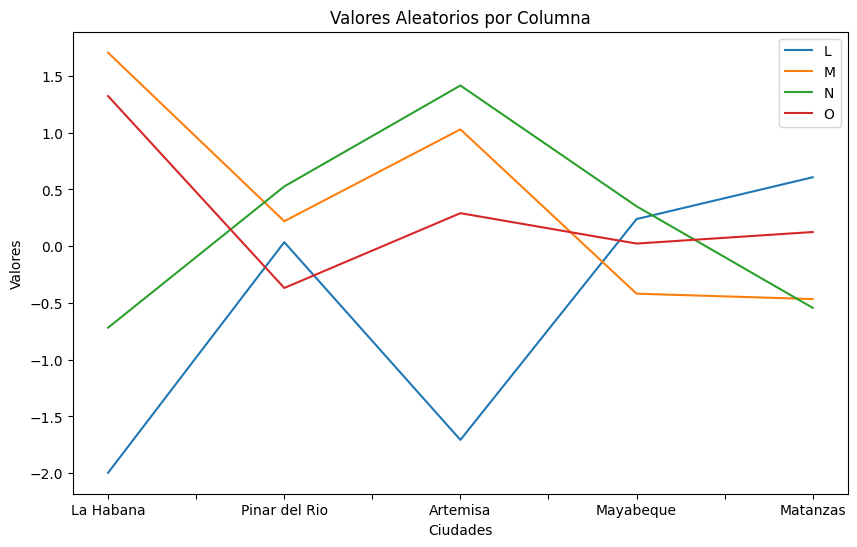

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

frame_1.plot(kind='line', figsize=(10, 6))  # Crear un gráfico de barras
plt.title('Valores Aleatorios por Columna')
plt.xlabel('Ciudades')
plt.ylabel('Valores')
plt.show()

In [13]:
np.abs(frame)

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Otra operación frecuente es aplicar una función en arrays unidimensionales a cada columna
o fila. El método apply de DataFrame hace exactamente esto:

In [11]:
def f1(x):
 return x.max() - x.min()
print(frame)
print()
frame.apply(f1)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0



b    9.0
d    9.0
e    9.0
dtype: float64

La expresión frame.apply(f1) aplica la función f1 a cada columna del DataFrame frame. La función f1 calcula el rango (diferencia entre el valor máximo y el valor mínimo) de cada columna. El resultado es una Serie donde cada valor representa el rango de la columna correspondiente en el DataFrame.

Aquí la función f , que calcula la diferencia entre el máximo y el mínimo de una Series, se invoca una vez en cada columna de frame . El resultado es una Series que tiene como
índice las columnas de frame . Si se pasa axis="columns" al método apply , la función se invocará una vez por fila. Una forma útil de pensar en esto es como "aplicar a través de
las columnas":

In [12]:
frame.apply(f1, axis="columns")

Utah      2.0
Ohio      2.0
Texas     2.0
Oregon    2.0
dtype: float64

La expresión frame.apply(f1, axis="columns") aplica la función f1 a lo largo del eje de las columnas (es decir, a cada fila) del DataFrame frame. La función f1 calcula el rango (diferencia entre el valor máximo y el valor mínimo) de cada fila. El resultado es una Serie donde cada valor representa el rango de la fila correspondiente en el DataFrame.

Muchos de los estadísticos de array más comunes (como suma y media) son métodos de DataFrame, por lo que no es necesario utilizar apply . No es necesario que la función
pasada a apply devuelva un valor escalar; también puede devolver una Serie con múltiples valores:

In [14]:
import pandas as pd

def f2(x):
 return pd.Series([x.min(), x.max()], index=["min", "max"])
print(frame)
print()
frame.apply(f2)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0



,b,d,e
min,0.0,1.0,2.0
max,9.0,10.0,11.0


La expresión frame.apply(f2) aplica la función f2 a cada columna del DataFrame frame. La función f2 calcula el valor mínimo y máximo de cada columna y devuelve una Serie con esos valores y los índices "min" y "max". El resultado final es un DataFrame donde cada fila representa el valor mínimo y máximo de las columnas originales del DataFrame.

In [15]:
def my_format(x):
    return f"{x:.2f}"
frame.applymap(my_format)

C:\Users\REY\AppData\Local\Temp\ipykernel_18048\1380983260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(my_format)


,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [32]:
def my_format(x):
    return f"{x:.2f}"
frame_1.applymap(my_format)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_11404\2576756332.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame_1.applymap(my_format)


,L,M,N,O
La Habana,-2.00,1.71,-0.72,1.32
Pinar del Rio,0.04,0.22,0.53,-0.37
Artemisa,-1.71,1.03,1.42,0.29
Mayabeque,0.24,-0.42,0.35,0.02
Matanzas,0.61,-0.47,-0.54,0.13


La expresión frame.applymap(my_format) aplica la función my_format a cada elemento individual del DataFrame frame. La función my_format formatea cada número a una cadena con exactamente dos dígitos después del punto decimal. El resultado es un DataFrame donde cada valor numérico ha sido convertido a una cadena con el formato especificado.

La razón del nombre `applymap` es que `Series` tiene un método `map` para aplicar una función `element-wise`:

In [16]:
frame["e"].map(my_format)

Utah       2.00
Ohio       5.00
Texas      8.00
Oregon    11.00
Name: e, dtype: object

La expresión frame["e"].map(my_format) aplica la función my_format a cada valor en la columna 'e' del DataFrame frame. La función my_format convierte cada valor en una cadena con exactamente dos dígitos decimales. El resultado es una Serie con los valores formateados como cadenas.

### Clasificación y ordenación
Ordenar un conjunto de datos por algún criterio es otra importante operación incorporada. Para ordenar lexicográficamente por etiqueta de fila o columna, utilice el método `sort_index`, que devuelve un nuevo objeto ordenado:

In [ ]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj

d    0
a    1
b    2
c    3
dtype: int64

La expresión obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"]) crea una Serie de pandas con los valores [0, 1, 2, 3] y el índice personalizado ["d", "a", "b", "c"]. La Serie resultante tiene valores enteros y el índice específico que se ha proporcionado.

In [ ]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Ordena 'obj' por 'indice'

Con un `DataFrame`,  se puede ordenar por índice en cualquiera de los ejes:

In [33]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])

frame_1 = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["four", "five"],
                     columns=["y", "u", "s", "k"])

print(frame)
print()
print(frame_1)

       d  a  b  c
three  0  1  2  3
one    4  5  6  7

      y  u  s  k
four  0  1  2  3
five  4  5  6  7


La expresión frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=["three", "one"], columns=["d", "a", "b", "c"]) crea un DataFrame de pandas con 2 filas y 4 columnas. Los datos del DataFrame son números enteros del 0 al 7 organizados en una matriz de 2 filas y 4 columnas, con las etiquetas de fila "three" y "one", y las etiquetas de columna "d", "a", "b", y "c".

In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


Ordena 'frame' por 'indice'

In [ ]:
frame.sort_index(axis="columns")

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Por defecto, los datos se ordenan en orden ascendente, pero también pueden ordenarse en orden descendente:

In [ ]:
frame.sort_index(axis="columns", ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Se ordena 'frame' por 'indice' pero en orden descendente

Para ordenar una `Serie` por sus valores, utilice su método `sort_values`:

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [19]:
import numpy as np
import pandas as pd

obj = pd.Series([4, 7, -3, 2])
print(obj)
print()
obj.sort_values()

0    4
1    7
2   -3
3    2
dtype: int64



2   -3
3    2
0    4
1    7
dtype: int64

La expresión obj.sort_values() ordena los valores de la Serie obj en orden ascendente. La función devuelve una nueva Serie con los valores ordenados, pero mantiene los índices originales correspondientes a los valores. Esto es útil para clasificar datos y ver cómo se distribuyen en orden ascendente.

Los valores que faltan se ordenan por defecto al final de la serie:

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

La expresión obj = pd.Series([4, np.nan, 7, np.nan, -3, 2]) crea una Serie de pandas con seis elementos. Esta Serie contiene valores numéricos y valores NaN, representando datos faltantes. El tipo de datos de la Serie es float64 debido a la inclusión de NaN. La Serie tiene índices numéricos por defecto que van de 0 a 5.

In [ ]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

Ordena por 'valores' manteniendo los ìndices originales

Los valores faltantes pueden ordenarse al principio utilizando la opción `na_position`:

In [ ]:
obj.sort_values(na_position="first")

1    NaN
3    NaN
4   -3.0
5    2.0
0    4.0
2    7.0
dtype: float64

La expresión obj.sort_values(na_position="first") ordena los valores en la Serie obj en orden ascendente y coloca los valores NaN al principio de la Serie resultante. Esto es útil cuando necesitas priorizar la visualización o el tratamiento de los valores faltantes (NaN) en tus datos.

Al ordenar un DataFrame, puede utilizar los datos de una o varias columnas como claves de ordenación. Para ello, pase uno o más nombres de columna a `sort_values`:

In [ ]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


La expresión frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]}) crea un DataFrame de pandas con dos columnas ("b" y "a") y cuatro filas. Los datos para la columna "b" son [4, 7, -3, 2] y para la columna "a" son [0, 1, 0, 1]. El DataFrame utiliza índices numéricos automáticos [0, 1, 2, 3].

In [ ]:
frame.sort_values("b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


Ordena solo los valores de la columna 'b' manteniendo los indices originales del DataFrame 'frame'

Para ordenar por varias columnas, pase una lista de nombres:

In [ ]:
frame.sort_values(["a", "b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ordena solo los valores de las columnas 'a' y 'b' manteniendo los indices originales del DataFrame 'frame'


La clasificación `Ranking` asigna rangos desde uno hasta el número de puntos de datos válidos en una array, empezando por el valor más bajo. Los métodos `rank` para `Series` y `DataFrame` son el lugar donde buscar; por defecto, `rank` rompe los empates asignando a cada grupo el rango medio:

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

La expresión obj = pd.Series([7, -5, 7, 4, 2, 0, 4]) crea una Serie de pandas con los valores [7, -5, 7, 4, 2, 0, 4] y usa índices numéricos automáticos [0, 1, 2, 3, 4, 5, 6]. La Serie tiene un tipo de datos int64, que es adecuado para almacenar enteros.

In [34]:
import numpy as np
import pandas as pd

obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
print(obj)
print()
obj.rank()

print()

obj_1 = pd.Series([7, 0, 0, 7, 8, 1, 4])
print(obj_1)
print()
obj_1.rank()

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64


0    7
1    0
2    0
3    7
4    8
5    1
6    4
dtype: int64



0    5.5
1    1.5
2    1.5
3    5.5
4    7.0
5    3.0
6    4.0
dtype: float64

La expresión obj.rank() calcula los rangos de los valores en la Serie obj. Cada valor recibe un rango basado en su posición en la ordenación ascendente de los valores, con el rango más bajo dado al valor más pequeño. Los valores duplicados reciben el mismo rango (los pone solo una vez), que puede ser el promedio de las posiciones o según el método de manejo de duplicados especificado.

También se pueden asignar rangos según el orden en que se observan en los datos:

In [23]:
import numpy as np
import pandas as pd

obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
print(obj)
print()
obj.rank(method="first")

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64



0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

La expresión obj.rank(method="first") calcula los rangos de los valores en la Serie obj y asigna los rangos en función del orden en que los valores aparecen en la Serie original cuando hay duplicados. Los valores duplicados reciben rangos consecutivos basados en su orden de aparición. Este método asegura que el primer valor en el caso de duplicados obtenga el rango más bajo disponible, y el siguiente valor duplicado obtenga el rango siguiente, y así sucesivamente.

Aquí, en lugar de utilizar el rango medio 6,5 para las entradas 0 y 2, se han fijado en 6 y 7 porque la etiqueta 0 precede a la etiqueta 2 en los datos.

También puedes clasificar en orden descendente:

obj

In [25]:
import numpy as np
import pandas as pd

print(obj)
print()
obj.rank(ascending=False)

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64



0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

Este enfoque es útil cuando necesitas clasificar los datos en el orden opuesto, es decir, donde los valores más grandes tienen prioridad en la asignación de rangos.

En ciencia de datos el método rank() puede usarse para identificar valores extremos, para identificar empates (duplicados), para ver la posibilidad de generar variables categóricas ordinales o que puede ser útil para aplicar modelos de aprendizaje automático que requieren entradas ordinales en lugar de valores numéricos continuos. 

Consulte la siguiente Tabla para ver una lista de los métodos de "desempate" (tie-breaking) disponibles.


<img src="tabla_6.png">

DataFrame puede calcular rangos sobre las filas o las columnas:

In [ ]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(axis="columns")

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Índices de ejes con etiquetas duplicadas
Hasta ahora casi todos los ejemplos que hemos visto tienen etiquetas de eje únicas (valores de índice). Aunque muchas funciones de pandas (como reindex) requieren que las etiquetas sean únicas, no es obligatorio. Consideremos una pequeña serie con índices duplicados:

In [35]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj_1 = pd.Series(np.arange(7), index=["c", "d", "e", "f", "g", "h", "i"])
print(obj)
print()
print(obj_1)

a    0
a    1
b    2
b    3
c    4
dtype: int64

c    0
d    1
e    2
f    3
g    4
h    5
i    6
dtype: int64


La propiedad `is_unique` del índice puede indicarle si sus etiquetas son únicas o no:

In [ ]:
obj.index.is_unique

False

In [36]:
obj_1.index.is_unique

True

La propiedad 'is_unique' es útil para asegurarte de que el índice del DataFrame o Series no contiene duplicados, lo cual puede ser importante para ciertas operaciones de datos que requieren índices únicos, como merge, join, o al establecer un índice con set_index.

La selección de datos es una de las principales cosas que se comporta de forma diferente con los duplicados. La indexación de una etiqueta con varias entradas devuelve una Serie, mientras que las entradas únicas devuelven un valor escalar:

In [ ]:
obj["a"]

a    0
a    1
dtype: int64

In [ ]:
obj["c"]

np.int64(4)

Esto puede complicar su código, ya que el tipo de salida de la indexación puede variar en función de si una etiqueta se repite o no. La misma lógica se extiende a la indexación de filas (o columnas) en un DataFrame:

In [37]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                index=["a", "a", "b", "b", "c"])

df_1 = pd.DataFrame(np.random.standard_normal((6, 6)),
                index=["A", "B", "C", "D", "E","F"])
print(df)
print()
print(df_1)  

          0         1         2
a  0.133960 -0.488868 -0.793571
a -0.721583 -1.904964  0.118177
b  0.048926 -0.910287  0.128217
b  0.770065  0.652938  0.011816
c  1.852167  1.402827 -2.028157

          0         1         2         3         4         5
A  1.523761 -0.583865 -1.414325 -0.784099  0.688858 -0.833712
B -0.998463  0.787674 -0.748457 -1.047133 -0.420032 -1.355900
C  0.558131 -0.860081 -0.471418  0.161746 -0.694429 -1.319110
D -1.912765  0.708301 -0.973458  0.216074  0.658770  0.125060
E -0.488316  0.617988  1.471841  0.932666 -0.258920  0.241098
F -0.824228  0.962220  0.452839 -0.881310 -0.528052  0.592925


El código crea un DataFrame de 5 filas y 3 columnas con valores aleatorios siguiendo una distribución normal estándar. Asigna índices a las filas, donde algunos índices están duplicados ("a" y "b" se repiten).

In [ ]:
df.loc["b"]

,0,1,2
b,1.092571,-1.381474,0.296716
b,0.030995,-0.843567,1.418541


In [38]:
df_1.loc["D"]

0   -1.912765
1    0.708301
2   -0.973458
3    0.216074
4    0.658770
5    0.125060
Name: D, dtype: float64

In [ ]:
df.loc["c"]

0   -0.126352
1    0.442508
2    0.532968
Name: c, dtype: float64

In [39]:
df_1.loc["A"]

0    1.523761
1   -0.583865
2   -1.414325
3   -0.784099
4    0.688858
5   -0.833712
Name: A, dtype: float64